In [13]:
from matplotlib import pyplot as plt
from numpy import *
from numpy import random

In [11]:
class Lattice:
    
    ux = array([1,0])
    uy = array([0,1])
    
    def __init__(self,gridx,basis=None):
        """
        gridx: the lattice width
        basis: a list of two-vector basis vectors
        """
        
        self.basis = basis
        self.v1 = self.basis[0]
        self.v2 = self.basis[1]
        self.gridx = gridx
        x0 = 0
        y0 = 0
        dx0 = dot(v1,ux)
        self.dx = dot(v2,ux)
        self.dy = dot(v1,uy)
        self.gridy = int(gridx*dx/dy)
    
    def plot(self, xlabel='x', ylabel='y', title='lattice',
             drawunit=False):
        """plot the lattice"""
        #TODO: add functionality to draw the unit cells
        xpts = array([x0 + j*dx for j in range(gridN)])

        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim((-dx, (gridx+1)*dx))
        ax.set_ylim((-dy, gridy*dy))
        for i in range(gridy):
            x = xpts + dx0*(i % 2)
            y = array([y0]*gridx)+dy*i
            ax.scatter(x, y, c='k')
            
    def rotate(self):
        """rotate the grid by theta via a transformation to the basis vectors"""
        # TODO: add code to do this
        
def get_grid(dx,dy,xnum,ynum):
    """
    Retunr xpts,ypts denoting centers of pts on a regular grid
    Args:
        dx,dy: center-center spacing in x,y directions
        xnum, ynum: number of columns, rows
    Return:
        xpts,ypts: lists of x coords,y coords for grid pts
    """
    xpts = []
    ypts = []
    for i in range(xnum):
        for j in range(ynum):
            ypts.append((1+i)*dy - dy*(1+ynum)/2)
            xpts.append((1+j)*dx - dx*(1+xnum)/2)
    return xpts, ypts

def figax(roi=None, xlabel=None, ylabel=None, aspect='equal', figkwargs={}):
    """
    return fig, ax. all params optional
    Args:
        roi: zoom to -roi, roi. None by default
        xlabel: None by default
        ylabel: None by default
        aspect: equal by default
    """
    fig,ax = plt.subplots(**figkwargs)
    if roi is not None:
        ax.set_xlim(-roi,roi)
        ax.set_ylim(-roi,roi)
    if aspect is not None:
        ax.set_aspect(aspect)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    return fig, ax

In [24]:
ynum = 2
xnum = 10
dx = dy = 200 # [nm]

xpts, ypts = get_grid(dx, dy, ynum, xnum)
# add randomness
x_std = y_std = 0 #[nm] 
xpts = array([x + nx for x,nx in zip(xpts,random.normal(0,x_std,xnum*ynum))])
ypts = array([y + ny for y,ny in zip(ypts,random.normal(0,y_std,xnum*ynum))])

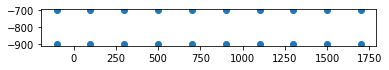

In [25]:
fig, ax = figax()
ax.scatter(xpts,ypts)

ValueError: operands could not be broadcast together with shapes (9,) (11,) 

In [40]:
# compute Bragg diffraction over 1D bilayer

klist = [2*pi/l for l in linspace(400,700,20)] # wave number
incidence_arr = linspace(-pi/3,pi/3,20)
z0 = 0 #arbitrary; kz0 just adds an overall phase
zf = 0 #1000000 # viewing plane [nm]
refl_components = empty((len(klist),xnum)) # space-varying field for each wave number
for j,k in enumerate(klist):
        
    field_k = zeros(xnum)
        
    for theta in incidence_arr:
        # assume interference from nearest neighbor column or same column based on angle of incidence
        
        if theta < -pi/2:
            col = -1 
        elif theta < pi/2:
            col = 0
        else:
            col = 1
                        
        # TODO generalize to accomadate > bilayer grids
        for i in range(int(ynum/2+0.5)): # iterate
            try:
                d = ypts[1:xnum][i] - ypts[xnum+col:][i]
                field_k[i] += exp(-i*k*zf)*array([cos(k*z0) + cos(k*z0+2*d*cos(theta))])
            except IndexError:
                pass
    refl_components[j] = field_k

In [43]:
len(refl_components[0])

10

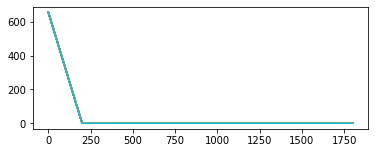

In [49]:
fig,ax = figax()
for j,k in enumerate(klist):
    ax.plot([i*dx for i in range(xnum)],abs(refl_components[j])**2,label=f"{2*pi/k}nm")

In [31]:
xlist[2]

IndexError: list index out of range